In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [6]:
df_mlp = pd.read_csv("df_alterp_tfidf.csv")

In [7]:
df_mlp

,index,tfidf_0,tfidf_1,tfidf_2,tfidf_3,tfidf_4,tfidf_5,tfidf_6,tfidf_7,tfidf_8,...,sweet,tar,tea,tobacco,tree,tropical,vanilla,violet,woody,X..Alpha-Terpinene
0,0,0.0,0.21444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.75
1,0,0.0,0.21444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.75
2,0,0.0,0.21444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.75
3,0,0.0,0.21444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.75
4,0,0.0,0.21444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,42968,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.00
74996,42972,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.00
74997,42973,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.00
74998,42974,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.00


In [8]:
df_mlp.columns.to_list()

['index',
 'tfidf_0',
 'tfidf_1',
 'tfidf_2',
 'tfidf_3',
 'tfidf_4',
 'tfidf_5',
 'tfidf_6',
 'tfidf_7',
 'tfidf_8',
 'tfidf_9',
 'tfidf_10',
 'tfidf_11',
 'tfidf_12',
 'tfidf_13',
 'tfidf_14',
 'tfidf_15',
 'tfidf_16',
 'tfidf_17',
 'tfidf_18',
 'tfidf_19',
 'tfidf_20',
 'tfidf_21',
 'tfidf_22',
 'tfidf_23',
 'tfidf_24',
 'tfidf_25',
 'tfidf_26',
 'tfidf_27',
 'tfidf_28',
 'tfidf_29',
 'tfidf_30',
 'tfidf_31',
 'tfidf_32',
 'tfidf_33',
 'tfidf_34',
 'tfidf_35',
 'tfidf_36',
 'tfidf_37',
 'tfidf_38',
 'tfidf_39',
 'tfidf_40',
 'tfidf_41',
 'tfidf_42',
 'tfidf_43',
 'tfidf_44',
 'tfidf_45',
 'tfidf_46',
 'tfidf_47',
 'tfidf_48',
 'tfidf_49',
 'tfidf_50',
 'tfidf_51',
 'tfidf_52',
 'tfidf_53',
 'tfidf_54',
 'tfidf_55',
 'tfidf_56',
 'tfidf_57',
 'tfidf_58',
 'tfidf_59',
 'tfidf_60',
 'tfidf_61',
 'tfidf_62',
 'tfidf_63',
 'tfidf_64',
 'tfidf_65',
 'tfidf_66',
 'tfidf_67',
 'tfidf_68',
 'tfidf_69',
 'tfidf_70',
 'tfidf_71',
 'tfidf_72',
 'tfidf_73',
 'tfidf_74',
 'tfidf_75',
 'tfidf_76',

In [9]:
df_mlp

,index,tfidf_0,tfidf_1,tfidf_2,tfidf_3,tfidf_4,tfidf_5,tfidf_6,tfidf_7,tfidf_8,...,sweet,tar,tea,tobacco,tree,tropical,vanilla,violet,woody,X..Alpha-Terpinene
0,0,0.0,0.21444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.75
1,0,0.0,0.21444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.75
2,0,0.0,0.21444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.75
3,0,0.0,0.21444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.75
4,0,0.0,0.21444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,42968,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.00
74996,42972,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.00
74997,42973,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.00
74998,42974,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.00


In [10]:
X = df_mlp.drop(['index', 'X..Alpha-Terpinene'], axis = 1)
y = df_mlp[['X..Alpha-Terpinene']]

<Axes: ylabel='Count'>

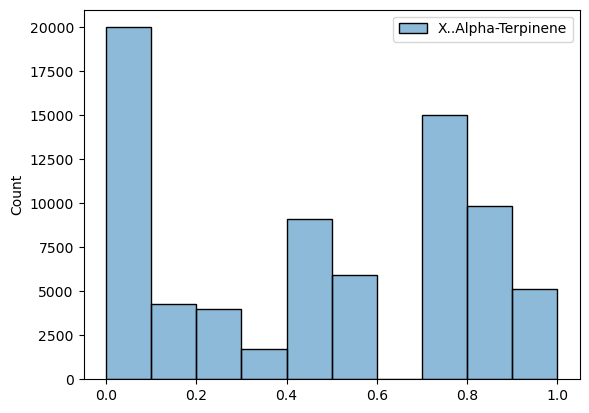

In [11]:
sns.histplot(y, bins = 10)

Train test split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [13]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

MLP modeling (before Feature selection and Hyperparameter Tuning)

In [14]:
mlpreg = MLPRegressor(random_state=1, early_stopping = True)
mlpreg.fit(X_train1, y_train1)
y_pred_mlp = mlpreg.predict(X_val)
y_pred_mlp_r2 = mlpreg.predict(X_train1)

/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1617: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
mean_absolute_error(y_val, y_pred_mlp)

0.05317946230236151

In [16]:
mean_squared_error(y_val, y_pred_mlp)

0.011952702153505591

In [17]:
mean_squared_error(y_val, y_pred_mlp, squared = False)

0.10932841420923287

In [18]:
#train
r2_score(y_train1, y_pred_mlp_r2)

0.9788744791201384

In [19]:
#val
r2_score(y_val, y_pred_mlp)

0.9019727121685528

Residual plots for each target variable

Feature Selection

In [20]:
rfreg = RandomForestRegressor()

In [21]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [22]:
selector.estimator_.feature_importances_

array([5.05531721e-04, 6.32020949e-04, 9.80910259e-03, 7.96350629e-04,
       1.72517887e-03, 1.21818957e-03, 1.13928198e-03, 2.41979201e-03,
       3.56405113e-04, 9.85620178e-04, 4.00852392e-04, 4.24673044e-03,
       3.15667338e-04, 6.47504697e-03, 9.21156561e-03, 7.28328378e-04,
       9.01519586e-04, 6.91611225e-04, 1.60515182e-04, 1.69586568e-03,
       1.53101032e-03, 1.40592933e-03, 9.51409423e-04, 1.16906044e-03,
       8.54131392e-04, 2.99570690e-04, 5.60285362e-04, 4.81224445e-04,
       3.52440659e-04, 2.89046864e-04, 2.63309604e-03, 6.08874417e-04,
       1.79367878e-03, 4.53638888e-04, 1.58662167e-03, 3.25948741e-03,
       5.68499270e-04, 2.66281319e-03, 1.73419663e-04, 1.15213824e-02,
       1.14487347e-03, 5.70247554e-04, 2.16990263e-04, 1.79362673e-03,
       3.00989485e-04, 7.87157771e-04, 1.35461380e-03, 7.75816230e-03,
       3.97708836e-03, 3.63415375e-04, 1.74253065e-04, 3.02419990e-04,
       6.83014082e-04, 6.71614400e-04, 7.44381638e-04, 6.50531493e-04,
      

In [23]:
selector.threshold_

0.0021321961620469083

In [24]:
mask = selector.get_support()

In [25]:
mask

array([False, False,  True, False, False, False, False,  True, False,
       False, False,  True, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
       False,  True, False,  True, False, False, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False,  True, False,  True, False, False, False, False, False,
       False, False,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False,  True,
       False,  True,

In [26]:
selected_features = X.columns[mask]

In [27]:
selected_X = df_mlp[selected_features]
selected_X

,tfidf_2,tfidf_7,tfidf_11,tfidf_13,tfidf_14,tfidf_30,tfidf_35,tfidf_37,tfidf_39,tfidf_47,...,cheese,citrus,diesel,grape,lemon,mango,pungent,skunk,strawberry,vanilla
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.14162,0.189796,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.14162,0.189796,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.14162,0.189796,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.14162,0.189796,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.14162,0.189796,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
74996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
74997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
74998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
selected_X.columns.to_list()

['tfidf_2',
 'tfidf_7',
 'tfidf_11',
 'tfidf_13',
 'tfidf_14',
 'tfidf_30',
 'tfidf_35',
 'tfidf_37',
 'tfidf_39',
 'tfidf_47',
 'tfidf_48',
 'tfidf_62',
 'tfidf_78',
 'tfidf_82',
 'tfidf_91',
 'tfidf_93',
 'tfidf_101',
 'tfidf_102',
 'tfidf_103',
 'tfidf_104',
 'tfidf_121',
 'tfidf_125',
 'tfidf_127',
 'tfidf_137',
 'tfidf_141',
 'tfidf_145',
 'tfidf_146',
 'tfidf_149',
 'tfidf_151',
 'tfidf_155',
 'tfidf_158',
 'tfidf_161',
 'tfidf_167',
 'tfidf_168',
 'tfidf_175',
 'tfidf_199',
 'tfidf_200',
 'tfidf_207',
 'tfidf_208',
 'tfidf_210',
 'tfidf_213',
 'tfidf_215',
 'tfidf_222',
 'tfidf_230',
 'tfidf_233',
 'tfidf_239',
 'tfidf_245',
 'tfidf_253',
 'tfidf_258',
 'tfidf_272',
 'tfidf_276',
 'tfidf_280',
 'tfidf_281',
 'tfidf_285',
 'tfidf_289',
 'tfidf_297',
 'tfidf_301',
 'tfidf_309',
 'tfidf_312',
 'tfidf_319',
 'tfidf_329',
 'tfidf_333',
 'tfidf_337',
 'tfidf_345',
 'tfidf_351',
 'tfidf_360',
 'tfidf_362',
 'tfidf_366',
 'tfidf_371',
 'hybrid',
 'sativa',
 'dry mouth',
 'euphoric',
 'f

In [29]:
import joblib

joblib.dump(selected_X, "selected_X_mlp_tfidf_alterp.pkl")
joblib.dump(selector, "selector_mlp_tfidf_alterp.pkl")

['selector_mlp_tfidf_alterp.pkl']

Train test split (after Feature Selection)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [31]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [32]:
mlpreg.fit(X_train1, y_train1)
y_pred_mlpreg = mlpreg.predict(X_val)
y_pred_mlpreg_r2 = mlpreg.predict(X_train1)

/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1617: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
mean_absolute_error(y_val, y_pred_mlpreg)

0.10308806905942394

In [34]:
#train
r2_score(y_train1, y_pred_mlpreg_r2)

0.8706852857175926

In [35]:
#val
r2_score(y_val, y_pred_mlpreg)

0.8013010500827651

Hyperparameter Tuning

In [36]:
parameters = {'hidden_layer_sizes': [(100,), (50, 50, 50), (50, 100, 50)],
              'activation': ['tanh', 'relu'],
              'max_iter': [200, 500, 1000]
              }

In [37]:
rscv = RandomizedSearchCV(mlpreg,  
                     parameters,   
                     cv=5, 
                     scoring='neg_mean_absolute_error',
                     n_jobs=-1)

In [38]:
rscv.fit(X_train1, y_train1)

/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1617: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1617: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1617: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perce

RandomizedSearchCV(cv=5,
                   estimator=MLPRegressor(early_stopping=True, random_state=1),
                   n_jobs=-1,
                   param_distributions={'activation': ['tanh', 'relu'],
                                        'hidden_layer_sizes': [(100,),
                                                               (50, 50, 50),
                                                               (50, 100, 50)],
                                        'max_iter': [200, 500, 1000]},
                   scoring='neg_mean_absolute_error')

In [39]:
rscv.best_params_

{'max_iter': 200, 'hidden_layer_sizes': (50, 100, 50), 'activation': 'relu'}

In [40]:
joblib.dump(rscv, "rscv_mlp_tfidf_alterp.pkl")
joblib.dump(rscv.best_params_, "rscv_mlp_tfidf_best_params_alterp.pkl")

['rscv_mlp_tfidf_best_params_alterp.pkl']

MLP fit (after hyperparameter tuning)

In [41]:
mlpreg_ht = MLPRegressor(random_state=1, max_iter = 200, hidden_layer_sizes=(50,100,50), activation = 'relu', early_stopping = True)
mlpreg_ht.fit(X_train1, y_train1)
y_pred_mlp_ht = mlpreg_ht.predict(X_val)
y_pred_mlp_r2_ht = mlpreg_ht.predict(X_train1)

/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1617: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [42]:
mean_absolute_error(y_val, y_pred_mlp_ht)

0.06895004341586025

In [43]:
mean_squared_error(y_val, y_pred_mlp_ht)

0.015330797244062597

In [44]:
mean_squared_error(y_val, y_pred_mlp_ht, squared = False)

0.12381759666567026

In [45]:
#train
r2_score(y_train1, y_pred_mlp_r2_ht)

0.9463451477157283

In [46]:
#val
r2_score(y_val, y_pred_mlp_ht)

0.8748261119197033

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [47]:
y_pred_mlpreg_test = mlpreg_ht.predict(X_test)

In [48]:
joblib.dump(y_pred_mlpreg_test, "y_pred_mlpreg_test_tfidf_alterp.pkl")
joblib.dump(y_test, "y_test_mlpreg_tfidf_alterp.pkl")

['y_test_mlpreg_tfidf_alterp.pkl']

In [49]:
mean_absolute_error(y_test, y_pred_mlpreg_test)

0.06927444159879202

In [50]:
mean_squared_error(y_test, y_pred_mlpreg_test)

0.015168875439065872

In [51]:
mean_squared_error(y_test, y_pred_mlpreg_test, squared = False)

0.12316198861282596

In [52]:
r2_score(y_test, y_pred_mlpreg_test)

0.8731592924460188

Error analysis

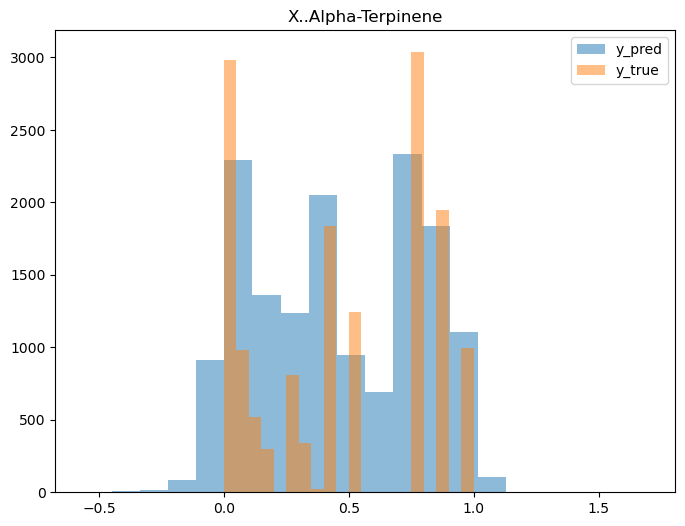

<Figure size 640x480 with 0 Axes>

In [53]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..Alpha-Terpinene"  # specify the target variable name
ax.hist(y_pred_mlpreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_mlp_tfidf_alterp.png')

Pearson R

In [54]:
corr_coef, p_value = pearsonr(y_pred_mlpreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.935
P-value: 0.000


<Axes: >

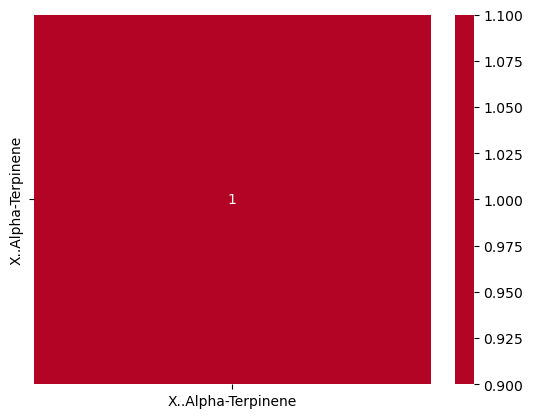

In [55]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)